In [ ]:
from google.colab import drive

drive.mount("/content/content")



Mounted at /content/content


In [ ]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.feature_selection import RFECV
from sklearn.preprocessing import StandardScaler
from matplotlib import pyplot as plt
import tensorflow as tf
from tensorflow import keras


In [ ]:

data_training = pd.read_csv(r"/content/content/MyDrive/harCopy/og data/train.csv")
act = ["WALKING", "WALKING_UPSTAIRS", "WALKING_DOWNSTAIRS", "SITTING", "STANDING", "LAYING"]
data_training['Activity'] = data_training["Activity"].replace(act, list(range(1,7)))

y = data_training["Activity"]
data_training = data_training.drop("Activity", axis=1)
columns = data_training.columns

scaler = StandardScaler()
data_ = scaler.fit_transform(data_training)
data_ = pd.DataFrame(data_, columns= data_training.columns)
data_training = data_

data_training = pd.DataFrame(data_training, columns= columns)

display(data_training)
data_training.shape





<ipython-input-12-846efbedfa87>:3: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  data_training['Activity'] = data_training["Activity"].replace(act, list(range(1,7)))


,tBodyAcc-mean()-X,tBodyAcc-mean()-Y,tBodyAcc-mean()-Z,tBodyAcc-std()-X,tBodyAcc-std()-Y,tBodyAcc-std()-Z,tBodyAcc-mad()-X,tBodyAcc-mad()-Y,tBodyAcc-mad()-Z,tBodyAcc-max()-X,tBodyAcc-max()-Y,tBodyAcc-max()-Z,tBodyAcc-min()-X,tBodyAcc-min()-Y,tBodyAcc-min()-Z,tBodyAcc-sma(),tBodyAcc-energy()-X,tBodyAcc-energy()-Y,tBodyAcc-energy()-Z,tBodyAcc-iqr()-X,tBodyAcc-iqr()-Y,tBodyAcc-iqr()-Z,tBodyAcc-entropy()-X,tBodyAcc-entropy()-Y,tBodyAcc-entropy()-Z,"tBodyAcc-arCoeff()-X,1","tBodyAcc-arCoeff()-X,2","tBodyAcc-arCoeff()-X,3","tBodyAcc-arCoeff()-X,4","tBodyAcc-arCoeff()-Y,1","tBodyAcc-arCoeff()-Y,2","tBodyAcc-arCoeff()-Y,3","tBodyAcc-arCoeff()-Y,4","tBodyAcc-arCoeff()-Z,1","tBodyAcc-arCoeff()-Z,2","tBodyAcc-arCoeff()-Z,3","tBodyAcc-arCoeff()-Z,4","tBodyAcc-correlation()-X,Y","tBodyAcc-correlation()-X,Z","tBodyAcc-correlation()-Y,Z",tGravityAcc-mean()-X,tGravityAcc-mean()-Y,tGravityAcc-mean()-Z,tGravityAcc-std()-X,tGravityAcc-std()-Y,tGravityAcc-std()-Z,tGravityAcc-mad()-X,tGravityAcc-mad()-Y,tGravityAcc-mad()-Z,tGravityAcc-max()-X,...,fBodyAccMag-meanFreq(),fBodyAccMag-skewness(),fBodyAccMag-kurtosis(),fBodyBodyAccJerkMag-mean(),fBodyBodyAccJerkMag-std(),fBodyBodyAccJerkMag-mad(),fBodyBodyAccJerkMag-max(),fBodyBodyAccJerkMag-min(),fBodyBodyAccJerkMag-sma(),fBodyBodyAccJerkMag-energy(),fBodyBodyAccJerkMag-iqr(),fBodyBodyAccJerkMag-entropy(),fBodyBodyAccJerkMag-maxInds,fBodyBodyAccJerkMag-meanFreq(),fBodyBodyAccJerkMag-skewness(),fBodyBodyAccJerkMag-kurtosis(),fBodyBodyGyroMag-mean(),fBodyBodyGyroMag-std(),fBodyBodyGyroMag-mad(),fBodyBodyGyroMag-max(),fBodyBodyGyroMag-min(),fBodyBodyGyroMag-sma(),fBodyBodyGyroMag-energy(),fBodyBodyGyroMag-iqr(),fBodyBodyGyroMag-entropy(),fBodyBodyGyroMag-maxInds,fBodyBodyGyroMag-meanFreq(),fBodyBodyGyroMag-skewness(),fBodyBodyGyroMag-kurtosis(),fBodyBodyGyroJerkMag-mean(),fBodyBodyGyroJerkMag-std(),fBodyBodyGyroJerkMag-mad(),fBodyBodyGyroJerkMag-max(),fBodyBodyGyroJerkMag-min(),fBodyBodyGyroJerkMag-sma(),fBodyBodyGyroJerkMag-energy(),fBodyBodyGyroJerkMag-iqr(),fBodyBodyGyroJerkMag-entropy(),fBodyBodyGyroJerkMag-maxInds,fBodyBodyGyroJerkMag-meanFreq(),fBodyBodyGyroJerkMag-skewness(),fBodyBodyGyroJerkMag-kurtosis(),"angle(tBodyAccMean,gravity)","angle(tBodyAccJerkMean),gravityMean)","angle(tBodyGyroMean,gravityMean)","angle(tBodyGyroJerkMean,gravityMean)","angle(X,gravityMean)","angle(Y,gravityMean)","angle(Z,gravityMean)",subject
0,0.200642,-0.063683,-0.419628,-0.868814,-0.939441,-0.737529,-0.859817,-0.939019,-0.766437,-0.856036,-0.925985,-0.637379,0.906009,0.868656,0.738383,-0.885916,-0.693031,-0.775696,-0.670496,-0.833962,-0.925417,-0.807547,-0.649898,-1.238226,-1.179995,3.412525,-3.876175,1.632454,-0.821570,1.100072,-1.168302,0.498702,-0.341757,0.941865,-2.304371,1.927733,-0.482268,1.380895,1.899523,1.442277,0.579172,-0.407955,0.061692,-0.265753,-0.306419,0.553242,-0.256319,-0.328767,0.410710,0.564447,...,-0.604622,-0.271475,-0.519917,-0.861593,-0.857020,-0.860645,-0.825582,-0.674907,-0.861593,-0.684106,-0.843920,-0.973551,-0.310213,0.665226,-0.566395,-0.542472,-0.856486,-0.831505,-0.870115,-0.769823,-0.601486,-0.856486,-0.648504,-0.856208,-1.002717,-0.701322,-0.291789,2.571343,2.878246,-0.771140,-0.747152,-0.754901,-0.733950,-0.616153,-0.771140,-0.462612,-0.761449,-0.929977,-0.706661,-0.795359,0.025960,-0.276399,-0.360603,0.062940,-0.778427,-0.026080,-0.687219,0.407946,-0.007568,-1.828851
1,0.055948,0.031486,-0.253908,-0.875426,-0.923902,-0.849304,-0.868531,-0.921998,-0.848928,-0.871359,-0.892228,-0.889197,0.895998,0.868656,0.766503,-0.920694,-0.693210,-0.775105,-0.687585,-0.847202,-0.899180,-0.820495,-1.304893,-0.830194,-1.096128,2.376047,-1.753252,1.321736,0.669927,0.551490,-0.545542,0.643345,-1.181642,0.267665,-0.256357,-0.225406,-0.610135,0.307609,0.365782,1.231020,0.585297,-0.409867,0.044451,-0.421683,-0.391036,0.049352,-0.424228,-0.386237,0.047391,0.564459,...,-0.438899,0.685326,0.541036,-0.853687,-0.852585,-0.855471,-0.828653,-0.680002,-0.853687,-0.683883,-0.843300,-0.973551,0.194698,1.394609,-

(7352, 562)

In [ ]:

duplicated_colums = data_training.T.duplicated(keep=False)
print(sum(duplicated_colums))
dd = data_training.T.drop_duplicates().T


40


In [ ]:
#duplicate columns

a = set(data_training.columns)
b = set(dd.columns)
a.difference(b)

{'fBodyAccMag-sma()',
 'fBodyBodyAccJerkMag-sma()',
 'fBodyBodyGyroJerkMag-sma()',
 'fBodyBodyGyroMag-sma()',
 'tBodyAccJerkMag-sma()',
 'tBodyAccMag-sma()',
 'tBodyGyroJerkMag-sma()',
 'tBodyGyroMag-sma()',
 'tGravityAccMag-arCoeff()1',
 'tGravityAccMag-arCoeff()2',
 'tGravityAccMag-arCoeff()3',
 'tGravityAccMag-arCoeff()4',
 'tGravityAccMag-energy()',
 'tGravityAccMag-entropy()',
 'tGravityAccMag-iqr()',
 'tGravityAccMag-mad()',
 'tGravityAccMag-max()',
 'tGravityAccMag-mean()',
 'tGravityAccMag-min()',
 'tGravityAccMag-sma()',
 'tGravityAccMag-std()'}

In [ ]:
from collections import defaultdict
duplicates = defaultdict(list)
columns = data_training.columns

for i in range(len(columns)):
    for j in range(i + 1, len(columns)):
        if data_training[columns[i]].equals(data_training[columns[j]]):
            duplicates[columns[i]].append(columns[j])

print(duplicates)



defaultdict(<class 'list'>, {'tBodyAccMag-mean()': ['tBodyAccMag-sma()', 'tGravityAccMag-mean()', 'tGravityAccMag-sma()'], 'tBodyAccMag-std()': ['tGravityAccMag-std()'], 'tBodyAccMag-mad()': ['tGravityAccMag-mad()'], 'tBodyAccMag-max()': ['tGravityAccMag-max()'], 'tBodyAccMag-min()': ['tGravityAccMag-min()'], 'tBodyAccMag-sma()': ['tGravityAccMag-mean()', 'tGravityAccMag-sma()'], 'tBodyAccMag-energy()': ['tGravityAccMag-energy()'], 'tBodyAccMag-iqr()': ['tGravityAccMag-iqr()'], 'tBodyAccMag-entropy()': ['tGravityAccMag-entropy()'], 'tBodyAccMag-arCoeff()1': ['tGravityAccMag-arCoeff()1'], 'tBodyAccMag-arCoeff()2': ['tGravityAccMag-arCoeff()2'], 'tBodyAccMag-arCoeff()3': ['tGravityAccMag-arCoeff()3'], 'tBodyAccMag-arCoeff()4': ['tGravityAccMag-arCoeff()4'], 'tGravityAccMag-mean()': ['tGravityAccMag-sma()'], 'tBodyAccJerkMag-mean()': ['tBodyAccJerkMag-sma()'], 'tBodyGyroMag-mean()': ['tBodyGyroMag-sma()'], 'tBodyGyroJerkMag-mean()': ['tBodyGyroJerkMag-sma()'], 'fBodyAccMag-mean()': ['fBod

In [ ]:
data_training = dd
data_training.shape

(7352, 541)

In [ ]:
from sklearn.decomposition import PCA

def net_var(data):
    pca = PCA()
    pca.fit(data)

    plt.plot( np.cumsum(pca.explained_variance_ratio_))
    plt.xlabel('Number of Components')
    plt.ylabel('Cumulative Explianed Variance')
    plt.title('Cummulative Explained Variance graph')
    plt.show()

def scree_plot(data, k=None):
  pca = PCA()
  pca.fit(data)
  plt.figure(figsize=(10,5))
  plt.bar(range(1, len(pca.explained_variance_ratio_)+1), pca.explained_variance_ratio_*100)
  plt.xlabel("principal components")
  plt.ylabel('variance explained')
  plt.xlim(0, 250)
  plt.title('Scree plot')

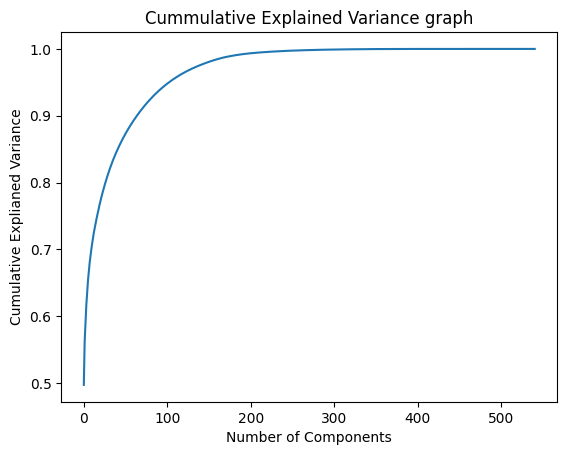

In [ ]:
net_var(data_training)

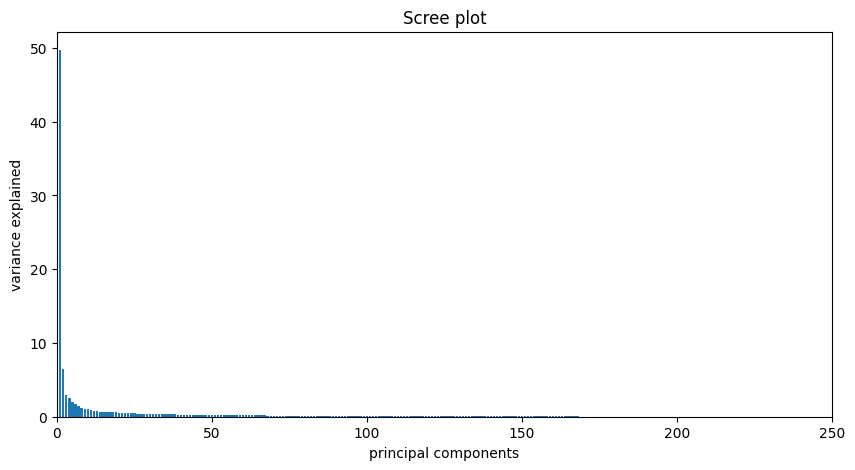

In [ ]:


scree_plot(data_training)




In [ ]:
#how many components to retain this much variance
U, Sigma, Vt = np.linalg.svd(data_training.cov())
get_var = lambda n: np.sum(Sigma[:n])/np.sum(Sigma)
get_n = lambda var: np.abs(np.array([get_var(k) for k in range(1,len(Sigma)+1)])-var).argmin()+1

n_components = get_n(0.995)
print(n_components)

215


In [ ]:
pca = PCA(n_components = 215)
data_pca = pca.fit_transform(data_training)
data_pca = pd.DataFrame(data_pca)
data_pca.columns = [f'PC{i}' for i in range(1,216)]
data_pca

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,PC11,PC12,PC13,PC14,PC15,PC16,PC17,PC18,PC19,PC20,PC21,PC22,PC23,PC24,PC25,PC26,PC27,PC28,PC29,PC30,PC31,PC32,PC33,PC34,PC35,PC36,PC37,PC38,PC39,PC40,PC41,PC42,PC43,PC44,PC45,PC46,PC47,PC48,PC49,PC50,...,PC166,PC167,PC168,PC169,PC170,PC171,PC172,PC173,PC174,PC175,PC176,PC177,PC178,PC179,PC180,PC181,PC182,PC183,PC184,PC185,PC186,PC187,PC188,PC189,PC190,PC191,PC192,PC193,PC194,PC195,PC196,PC197,PC198,PC199,PC200,PC201,PC202,PC203,PC204,PC205,PC206,PC207,PC208,PC209,PC210,PC211,PC212,PC213,PC214,PC215
0,-15.807804,2.567225,-3.030922,-0.095753,-6.844165,-4.166523,3.310113,-4.879562,1.076657,-3.366656,0.081660,-0.794942,1.270793,1.869446,-2.361084,0.606291,3.850678,1.331684,2.703996,0.051901,-3.683277,1.756430,-0.018323,-1.026921,0.403035,3.736827,-0.899401,0.176100,0.702635,-2.853741,-1.392136,-1.878529,2.645581,-1.629278,-0.554363,0.860934,-0.812540,1.108496,0.869617,-1.535270,-0.411503,-2.133689,-3.177873,0.261855,1.836990,-0.034579,0.397821,-1.205788,-0.757397,-1.715864,...,-0.606737,0.348093,0.527423,-0.357547,-0.792770,-0.590734,-0.200466,-0.039906,-0.202566,0.161666,-0.063086,0.912948,0.718846,-0.388500,0.009006,0.228920,-0.213016,-0.453997,-0.037159,-0.411815,0.224023,-0.290073,0.351622,-0.623142,-0.215489,-0.385215,0.627624,-0.076908,0.343204,-0.474757,-0.304789,-0.186037,-0.065400,-0.026581,0.398898,0.030735,-0.130543,0.179665,0.085134,-0.106344,0.191917,-0.265010,0.120659,-0.063948,-0.051607,0.040768,-0.169544,-0.393553,0.147764,-0.073578
1,-14.796788,1.260822,0.714700,-2.901084,-4.275223,-1.772602,0.128317,-1.980383,-0.455486,-0.197010,-1.128271,-0.144355,-0.142013,-0.685344,-0.861338,-1.043046,-0.366580,0.162149,0.954472,0.104212,-1.817983,1.768612,0.319794,-0.980134,-0.269912,-1.154689,-1.350814,-0.360409,-0.070050,-0.062728,-0.174625,0.605397,-1.262359,-0.380036,0.405752,-0.780369,0.926629,-1.099156,0.867710,-0.028063,-0.850943,0.228200,1.271008,0.074786,-0.026481,0.229657,-0.713646,-0.918328,-0.065487,0.541130,...,-0.000947,-0.008694,0.332395,0.002332,0.028587,0.455842,-0.091968,-0.259010,-0.416235,0.352864,0.370306,0.002909,0.009060,0.351019,0.075498,0.170828,-0.345336,0.015345,-0.007995,-0.392613,0.038840,0.031949,-0.474263,-0.348710,0.320870,-0.024305,-0.057792,-0.288158,-0.175220,0.226926,0.001799,0.221523,-0.210246,0.129678,0.061394,0.129034,-0.073325,-0.067172,0.064517,-0.143519,0.004760,0.111888,0.032027,-0.129234,0.082260,-0.159149,0.051101,0.036225,0.167045,0.000377
2,-14.631341,2.431553,1.839300,-3.858079,-4.092149,-1.155196,0.113524,-1.599250,-0.483732,-0.657243,-0.647767,0.269575,0.260597,1.823102,-0.690176,-0.764462,-0.448375,-0.555270,-0.042445,-0.027758,-0.503577,0.692549,0.539331,-0.129713,-0.412124,-1.581272,-0.450500,0.681446,-0.290058,-0.710185,-2.149944,1.272536,-0.614054,-0.102213,0.096392,-0.800397,1.572179,-0.766497,1.551513,-0.242781,-0.714363,1.403054,0.144139,-0.715198,-0.772120,1.238808,-0.883208,0.244381,0.448610,1.382838,...,-0.231639,0.654661,0.332528,-0.161913,0.185514,-0.058785,-0.051730,-0.320330,-0.183650,0.048491,0.045729,0.054423,0.003154,-0.007129,-0.097936,-0.233051,-0.323486,0.191136,0.098611,-0.094338,-0.017218,0.083202,0.085001,-0.351065,0.153496,-0.049369,-0.248333,-0.033519,0.117621,0.408186,0.205280,-0.068753,-0.007386,-0.117136,-0.107156,-0.090444,-0.091153,0.036104,-0.039949,-0.177154,-0.008138,0.164195,0.011855,-0.031202,0.109242,0.015534,-0.001091,0.304218,-0.026647,0.003714
3,-14.917689,4.235965,1.963382,-2.845855,-3.012827,-1.015404,0.508824,-2.187997,-0.979134,-1.289415,-0.407331,0.408757,-1.011166,0.480317,0.764753,1.118026,0.053119,1.151768,-0.987059,-0.638196,0.140590,0.090522,-0.081360,-1.044699,1.123810,-1.913870,1.110395,0.034933,-0.775712,0.574878,-1.423636,1.741182,-0.509577,-0.592656,-0.440175,0.444240,-0.177149,-0.755755,-0.934663,0.248865,-0.077072,0.583844,0.209424,0.401952,0.719571,1.789500,0.030940,0.194344,1.192006,2.648414,...,0.522782,-0.449215,-0.251425,-0.187180,0.562127,0.116778,-0.062225,-0.864619,-0.400

In [ ]:
y.to_csv(r"/content/content/MyDrive/harCopy/y.csv")
data_pca.to_csv('/content/content/MyDrive/harCopy/PCA_datasets/PCA_data.csv')

In [ ]:
#performing recursive feature elimination with cross validation to compare results with pca

estimator = LinearRegression()
rfecv = RFECV(estimator, cv = 8)



data_rfecv = rfecv.fit_transform(data_training,y)


selected_features_mask = rfecv.support_


selected_features = data_training.columns[selected_features_mask]

print("Selected Features:")
print(list(selected_features))


print(f'number of selected features: {rfecv.n_features_}')  #the number of features the algorithm deems fit based on rfecv

data_rfecv =  pd.DataFrame(data_rfecv, columns = data_training.columns[rfecv.support_==True].tolist() )


Selected Features:
['tBodyAcc-mean()-X', 'tBodyAcc-std()-X', 'tBodyAcc-std()-Y', 'tBodyAcc-std()-Z', 'tBodyAcc-mad()-X', 'tBodyAcc-mad()-Z', 'tBodyAcc-max()-X', 'tBodyAcc-max()-Y', 'tBodyAcc-max()-Z', 'tBodyAcc-min()-X', 'tBodyAcc-min()-Y', 'tBodyAcc-min()-Z', 'tBodyAcc-sma()', 'tBodyAcc-energy()-X', 'tBodyAcc-energy()-Y', 'tBodyAcc-energy()-Z', 'tBodyAcc-iqr()-X', 'tBodyAcc-iqr()-Y', 'tBodyAcc-iqr()-Z', 'tBodyAcc-entropy()-X', 'tBodyAcc-entropy()-Y', 'tBodyAcc-entropy()-Z', 'tBodyAcc-arCoeff()-X,1', 'tBodyAcc-arCoeff()-X,2', 'tBodyAcc-arCoeff()-X,3', 'tBodyAcc-arCoeff()-X,4', 'tBodyAcc-arCoeff()-Y,1', 'tBodyAcc-arCoeff()-Y,2', 'tBodyAcc-arCoeff()-Y,3', 'tBodyAcc-arCoeff()-Y,4', 'tBodyAcc-arCoeff()-Z,1', 'tBodyAcc-arCoeff()-Z,2', 'tBodyAcc-arCoeff()-Z,3', 'tBodyAcc-arCoeff()-Z,4', 'tBodyAcc-correlation()-X,Y', 'tBodyAcc-correlation()-X,Z', 'tBodyAcc-correlation()-Y,Z', 'tGravityAcc-mean()-X', 'tGravityAcc-mean()-Z', 'tGravityAcc-std()-X', 'tGravityAcc-std()-Y', 'tGravityAcc-std()-Z', '

In [ ]:
unselected_features = data_training.columns[~rfecv.support_]
print("Features NOT Selected:")
print(list(unselected_features))

Features NOT Selected:
['tBodyAcc-mean()-Y', 'tBodyAcc-mean()-Z', 'tBodyAcc-mad()-Y', 'tGravityAcc-mean()-Y', 'tBodyAccJerk-mean()-X', 'tBodyAccJerk-mean()-Y', 'tBodyAccJerk-min()-Z', 'tBodyAccJerk-arCoeff()-Y,1', 'tBodyAccJerk-arCoeff()-Y,3', 'tBodyAccJerk-correlation()-Y,Z', 'tBodyGyro-mean()-Y', 'tBodyGyro-max()-Z', 'tBodyGyro-arCoeff()-Y,4', 'tBodyGyro-arCoeff()-Z,4', 'tBodyGyroJerk-mean()-Y', 'tBodyGyroJerk-mean()-Z', 'tBodyGyroJerk-arCoeff()-X,2', 'tBodyGyroJerk-arCoeff()-Z,1', 'tBodyAccJerkMag-max()', 'tBodyAccJerkMag-min()', 'tBodyAccJerkMag-iqr()', 'tBodyGyroJerkMag-min()', 'tBodyGyroJerkMag-iqr()', 'fBodyAcc-max()-Z', 'fBodyAcc-min()-Y', 'fBodyAcc-maxInds-Y', 'fBodyAcc-maxInds-Z', 'fBodyAcc-meanFreq()-X', 'fBodyAcc-meanFreq()-Y', 'fBodyAccJerk-min()-Y', 'fBodyAccJerk-min()-Z', 'fBodyAccJerk-iqr()-Z', 'fBodyAccJerk-maxInds-Z', 'fBodyAccJerk-skewness()-Z', 'fBodyGyro-mad()-Z', 'fBodyGyro-min()-X', 'fBodyGyro-maxInds-X', 'fBodyGyro-maxInds-Y', 'fBodyAccMag-min()', 'fBodyAccMag-m

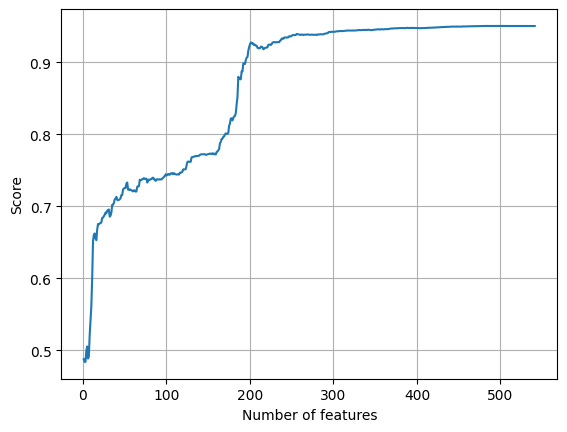

In [ ]:




scores = rfecv.cv_results_['mean_test_score']

# Plotting the scores
plt.figure()
plt.xlabel("Number of features")
plt.ylabel("Score")
plt.plot(range(1, len(scores) + 1), scores)
plt.grid(True)
plt.show()




In [ ]:
data_rfecv.to_csv('/content/content/MyDrive/harCopy/RFECV_datasets/data_rfecv.csv')

In [ ]:
from sklearn.feature_selection import RFECV
from sklearn.decomposition import PCA
import pandas as pd


dataTest = pd.read_csv('/content/content/MyDrive/harCopy/og data/test.csv')

act = ["WALKING", "WALKING_UPSTAIRS", "WALKING_DOWNSTAIRS", "SITTING", "STANDING", "LAYING"]
dataTest['Activity'] = dataTest["Activity"].replace(act, list(range(1,7)))

y_test = dataTest["Activity"]
dataTest = dataTest.drop("Activity", axis=1)
columns = dataTest.columns

y_test.to_csv('/content/content/MyDrive/harCopy/y_test.csv')

data_ = scaler.transform(dataTest)
data_ = pd.DataFrame(data_, columns= columns)
dataTest = data_

dataTest = pd.DataFrame(dataTest, columns= columns)





<ipython-input-36-35a69a474dfa>:9: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  dataTest['Activity'] = dataTest["Activity"].replace(act, list(range(1,7)))


In [ ]:
dataTest

,tBodyAcc-mean()-X,tBodyAcc-mean()-Y,tBodyAcc-mean()-Z,tBodyAcc-std()-X,tBodyAcc-std()-Y,tBodyAcc-std()-Z,tBodyAcc-mad()-X,tBodyAcc-mad()-Y,tBodyAcc-mad()-Z,tBodyAcc-max()-X,tBodyAcc-max()-Y,tBodyAcc-max()-Z,tBodyAcc-min()-X,tBodyAcc-min()-Y,tBodyAcc-min()-Z,tBodyAcc-sma(),tBodyAcc-energy()-X,tBodyAcc-energy()-Y,tBodyAcc-energy()-Z,tBodyAcc-iqr()-X,tBodyAcc-iqr()-Y,tBodyAcc-iqr()-Z,tBodyAcc-entropy()-X,tBodyAcc-entropy()-Y,tBodyAcc-entropy()-Z,"tBodyAcc-arCoeff()-X,1","tBodyAcc-arCoeff()-X,2","tBodyAcc-arCoeff()-X,3","tBodyAcc-arCoeff()-X,4","tBodyAcc-arCoeff()-Y,1","tBodyAcc-arCoeff()-Y,2","tBodyAcc-arCoeff()-Y,3","tBodyAcc-arCoeff()-Y,4","tBodyAcc-arCoeff()-Z,1","tBodyAcc-arCoeff()-Z,2","tBodyAcc-arCoeff()-Z,3","tBodyAcc-arCoeff()-Z,4","tBodyAcc-correlation()-X,Y","tBodyAcc-correlation()-X,Z","tBodyAcc-correlation()-Y,Z",tGravityAcc-mean()-X,tGravityAcc-mean()-Y,tGravityAcc-mean()-Z,tGravityAcc-std()-X,tGravityAcc-std()-Y,tGravityAcc-std()-Z,tGravityAcc-mad()-X,tGravityAcc-mad()-Y,tGravityAcc-mad()-Z,tGravityAcc-max()-X,...,fBodyAccMag-meanFreq(),fBodyAccMag-skewness(),fBodyAccMag-kurtosis(),fBodyBodyAccJerkMag-mean(),fBodyBodyAccJerkMag-std(),fBodyBodyAccJerkMag-mad(),fBodyBodyAccJerkMag-max(),fBodyBodyAccJerkMag-min(),fBodyBodyAccJerkMag-sma(),fBodyBodyAccJerkMag-energy(),fBodyBodyAccJerkMag-iqr(),fBodyBodyAccJerkMag-entropy(),fBodyBodyAccJerkMag-maxInds,fBodyBodyAccJerkMag-meanFreq(),fBodyBodyAccJerkMag-skewness(),fBodyBodyAccJerkMag-kurtosis(),fBodyBodyGyroMag-mean(),fBodyBodyGyroMag-std(),fBodyBodyGyroMag-mad(),fBodyBodyGyroMag-max(),fBodyBodyGyroMag-min(),fBodyBodyGyroMag-sma(),fBodyBodyGyroMag-energy(),fBodyBodyGyroMag-iqr(),fBodyBodyGyroMag-entropy(),fBodyBodyGyroMag-maxInds,fBodyBodyGyroMag-meanFreq(),fBodyBodyGyroMag-skewness(),fBodyBodyGyroMag-kurtosis(),fBodyBodyGyroJerkMag-mean(),fBodyBodyGyroJerkMag-std(),fBodyBodyGyroJerkMag-mad(),fBodyBodyGyroJerkMag-max(),fBodyBodyGyroJerkMag-min(),fBodyBodyGyroJerkMag-sma(),fBodyBodyGyroJerkMag-energy(),fBodyBodyGyroJerkMag-iqr(),fBodyBodyGyroJerkMag-entropy(),fBodyBodyGyroJerkMag-maxInds,fBodyBodyGyroJerkMag-meanFreq(),fBodyBodyGyroJerkMag-skewness(),fBodyBodyGyroJerkMag-kurtosis(),"angle(tBodyAccMean,gravity)","angle(tBodyAccJerkMean),gravityMean)","angle(tBodyGyroMean,gravityMean)","angle(tBodyGyroJerkMean,gravityMean)","angle(X,gravityMean)","angle(Y,gravityMean)","angle(Z,gravityMean)",subject
0,-0.246388,-0.136979,1.668462,-0.742061,-0.814056,-0.150313,-0.759330,-0.819786,-0.164580,-0.781407,-0.880627,0.309337,0.532657,0.722136,0.655219,-0.699899,-0.684638,-0.764224,-0.398983,-0.784009,-0.823709,-0.515879,-0.138810,-0.551320,1.104555,2.081014,-2.395019,2.134760,-0.764781,0.925470,-0.749889,-0.139387,0.024382,-0.403376,0.186123,-0.881009,0.510023,0.556604,-0.896236,-2.112372,0.527100,-0.789134,0.061443,0.501260,0.182263,3.476337,0.460320,0.186444,3.134351,0.591951,...,-2.082814,1.090287,0.739608,-0.631505,-0.616353,-0.621337,-0.648273,-0.340695,-0.631505,-0.656145,-0.655335,-0.204402,-0.646820,-0.841621,0.163743,-0.245824,-0.231044,-0.322887,-0.261057,-0.319171,-0.304539,-0.231044,-0.501713,-0.246611,0.436964,-0.701322,-0.003096,-0.655846,-0.599822,-0.401827,-0.432966,-0.425825,-0.431656,-0.196048,-0.401827,-0.420561,-0.439996,0.078959,-0.706661,-0.213757,-0.072779,-0.262320,-0.006596,0.358560,-1.372126,0.579845,-0.450322,0.733571,-0.005244,-1.717425
1,0.164235,0.111059,-0.175548,-0.824544,-0.908299,-0.812607,-0.840212,-0.908595,-0.820280,-0.781407,-0.880627,-0.847014,0.672446,0.862408,0.679427,-0.893491,-0.691624,-0.773975,-0.684498,-0.833358,-0.887799,-0.826950,-0.425321,-0.480987,-0.648574,2.036277,-1.051425,0.322058,0.619489,0.869560,-1.027401,1.204111,-1.449263,0.238184,-0.542438,-0.005426,0.294566,0.055483,-0.710756,0.763384,0.509517,-0.806587,0.168641,-0.314569,-0.330241,-0.259832,-0.308432,-0.314869,-0.253774,0.494102,...,0.487702,0.428050,0.083120,-0.748983,-0.709739,-0.716152,-0.707033,-0.598955,-0.748983,-0.674094,-0.751671,-0.561117,-0.646820,-2.638187,0.27

In [ ]:

duplicated_colums = dataTest.T.duplicated(keep=False)

dd = dataTest.T.drop_duplicates().T
dataTest = pd.DataFrame(dd)
dataTest.shape


(2947, 541)

In [ ]:

dataTest_rfecv = rfecv.transform(dataTest)
dataTest_rfecv =  pd.DataFrame(dataTest_rfecv, columns = dataTest.columns[rfecv.support_==True].tolist() )
dataTest_rfecv.to_csv('/content/content/MyDrive/harCopy/RFECV_datasets/dataTest_rfecv.csv')

data_pcaTest = pca.transform(dataTest)
data_pcaTest = pd.DataFrame(data_pcaTest)

data_pcaTest.to_csv('/content/content/MyDrive/harCopy/PCA_datasets/data_pcaTest.csv')

In [50]:
dataTest.to_csv('/content/content/MyDrive/harCopy/og data/test.csv')

In [51]:
data_training.to_csv('/content/content/MyDrive/harCopy/og data/train.csv')

In [49]:
data_training

,tBodyAcc-mean()-X,tBodyAcc-mean()-Y,tBodyAcc-mean()-Z,tBodyAcc-std()-X,tBodyAcc-std()-Y,tBodyAcc-std()-Z,tBodyAcc-mad()-X,tBodyAcc-mad()-Y,tBodyAcc-mad()-Z,tBodyAcc-max()-X,tBodyAcc-max()-Y,tBodyAcc-max()-Z,tBodyAcc-min()-X,tBodyAcc-min()-Y,tBodyAcc-min()-Z,tBodyAcc-sma(),tBodyAcc-energy()-X,tBodyAcc-energy()-Y,tBodyAcc-energy()-Z,tBodyAcc-iqr()-X,tBodyAcc-iqr()-Y,tBodyAcc-iqr()-Z,tBodyAcc-entropy()-X,tBodyAcc-entropy()-Y,tBodyAcc-entropy()-Z,"tBodyAcc-arCoeff()-X,1","tBodyAcc-arCoeff()-X,2","tBodyAcc-arCoeff()-X,3","tBodyAcc-arCoeff()-X,4","tBodyAcc-arCoeff()-Y,1","tBodyAcc-arCoeff()-Y,2","tBodyAcc-arCoeff()-Y,3","tBodyAcc-arCoeff()-Y,4","tBodyAcc-arCoeff()-Z,1","tBodyAcc-arCoeff()-Z,2","tBodyAcc-arCoeff()-Z,3","tBodyAcc-arCoeff()-Z,4","tBodyAcc-correlation()-X,Y","tBodyAcc-correlation()-X,Z","tBodyAcc-correlation()-Y,Z",tGravityAcc-mean()-X,tGravityAcc-mean()-Y,tGravityAcc-mean()-Z,tGravityAcc-std()-X,tGravityAcc-std()-Y,tGravityAcc-std()-Z,tGravityAcc-mad()-X,tGravityAcc-mad()-Y,tGravityAcc-mad()-Z,tGravityAcc-max()-X,...,fBodyAccMag-iqr(),fBodyAccMag-entropy(),fBodyAccMag-maxInds,fBodyAccMag-meanFreq(),fBodyAccMag-skewness(),fBodyAccMag-kurtosis(),fBodyBodyAccJerkMag-mean(),fBodyBodyAccJerkMag-std(),fBodyBodyAccJerkMag-mad(),fBodyBodyAccJerkMag-max(),fBodyBodyAccJerkMag-min(),fBodyBodyAccJerkMag-energy(),fBodyBodyAccJerkMag-iqr(),fBodyBodyAccJerkMag-entropy(),fBodyBodyAccJerkMag-maxInds,fBodyBodyAccJerkMag-meanFreq(),fBodyBodyAccJerkMag-skewness(),fBodyBodyAccJerkMag-kurtosis(),fBodyBodyGyroMag-mean(),fBodyBodyGyroMag-std(),fBodyBodyGyroMag-mad(),fBodyBodyGyroMag-max(),fBodyBodyGyroMag-min(),fBodyBodyGyroMag-energy(),fBodyBodyGyroMag-iqr(),fBodyBodyGyroMag-entropy(),fBodyBodyGyroMag-maxInds,fBodyBodyGyroMag-meanFreq(),fBodyBodyGyroMag-skewness(),fBodyBodyGyroMag-kurtosis(),fBodyBodyGyroJerkMag-mean(),fBodyBodyGyroJerkMag-std(),fBodyBodyGyroJerkMag-mad(),fBodyBodyGyroJerkMag-max(),fBodyBodyGyroJerkMag-min(),fBodyBodyGyroJerkMag-energy(),fBodyBodyGyroJerkMag-iqr(),fBodyBodyGyroJerkMag-entropy(),fBodyBodyGyroJerkMag-maxInds,fBodyBodyGyroJerkMag-meanFreq(),fBodyBodyGyroJerkMag-skewness(),fBodyBodyGyroJerkMag-kurtosis(),"angle(tBodyAccMean,gravity)","angle(tBodyAccJerkMean),gravityMean)","angle(tBodyGyroMean,gravityMean)","angle(tBodyGyroJerkMean,gravityMean)","angle(X,gravityMean)","angle(Y,gravityMean)","angle(Z,gravityMean)",subject
0,0.200642,-0.063683,-0.419628,-0.868814,-0.939441,-0.737529,-0.859817,-0.939019,-0.766437,-0.856036,-0.925985,-0.637379,0.906009,0.868656,0.738383,-0.885916,-0.693031,-0.775696,-0.670496,-0.833962,-0.925417,-0.807547,-0.649898,-1.238226,-1.179995,3.412525,-3.876175,1.632454,-0.821570,1.100072,-1.168302,0.498702,-0.341757,0.941865,-2.304371,1.927733,-0.482268,1.380895,1.899523,1.442277,0.579172,-0.407955,0.061692,-0.265753,-0.306419,0.553242,-0.256319,-0.328767,0.410710,0.564447,...,-0.794353,-0.656912,-0.156111,-0.604622,-0.271475,-0.519917,-0.861593,-0.857020,-0.860645,-0.825582,-0.674907,-0.684106,-0.843920,-0.973551,-0.310213,0.665226,-0.566395,-0.542472,-0.856486,-0.831505,-0.870115,-0.769823,-0.601486,-0.648504,-0.856208,-1.002717,-0.701322,-0.291789,2.571343,2.878246,-0.771140,-0.747152,-0.754901,-0.733950,-0.616153,-0.462612,-0.761449,-0.929977,-0.706661,-0.795359,0.025960,-0.276399,-0.360603,0.062940,-0.778427,-0.026080,-0.687219,0.407946,-0.007568,-1.828851
1,0.055948,0.031486,-0.253908,-0.875426,-0.923902,-0.849304,-0.868531,-0.921998,-0.848928,-0.871359,-0.892228,-0.889197,0.895998,0.868656,0.766503,-0.920694,-0.693210,-0.775105,-0.687585,-0.847202,-0.899180,-0.820495,-1.304893,-0.830194,-1.096128,2.376047,-1.753252,1.321736,0.669927,0.551490,-0.545542,0.643345,-1.181642,0.267665,-0.256357,-0.225406,-0.610135,0.307609,0.365782,1.231020,0.585297,-0.409867,0.044451,-0.421683,-0.391036,0.049352,-0.424228,-0.386237,0.047391,0.564459,...,-0.826339,-0.906371,-0.926051,-0.438899,0.685326,0.541036,-0.853687,-0.852585,-0.855471,-0.828653,-0.680002,-0.683883,-0.843300,-0.973551,0.194698,1.3946